## Libraries

Import all the required libraries

In [12]:
# Importing the libraries
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt

# calculate training time
import time

# for creation of validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [13]:
# for reading ubyte file
!pip install idx2numpy
import idx2numpy

## Read data

In [15]:
# import the data

trainimagefile = 'Data/train_images'
trainlabelfile = 'Data/train_labels'
testimagefile = 'Data/test_images'
testlabelfile = 'Data/test_labels'

X_train = idx2numpy.convert_from_file(trainimagefile)
y_train = idx2numpy.convert_from_file(trainlabelfile)
X_test = idx2numpy.convert_from_file(testimagefile)
y_test = idx2numpy.convert_from_file(testlabelfile)

In [16]:
labels = {"0":"T-shirt/top",
"1":"Trouser",
"2":"Pullover",
"3":"Dress",
"4":"Coat",
"5":"Sandal",
"6":"Shirt",
"7":"Sneaker",
"8":"Bag",
"9":"Ankle boot"}

Sneaker


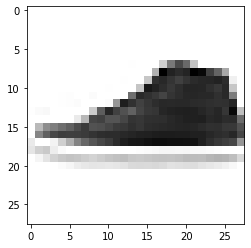

In [22]:
# display a image in trainset
id = 41
plt.imshow(X_train[id], cmap=plt.cm.binary)
print(labels[str(y_train[id])])

## Spliting the data

In [ ]:
# create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Shape of train (images) set
X_train.shape

(54000, 28, 28)

In [ ]:
# Shape of validation (images) set
X_val.shape

(6000, 28, 28)

## Create Tensors

In [ ]:
# reshape train set of images and create tensor from numpy array
X_train = X_train.reshape(54000, 1, 28, 28)
X_train = torch.from_numpy(X_train)

# create tensor for train set of labels
y_train = y_train.astype(int)
y_train = torch.from_numpy(y_train)

# sizes of tensors
X_train.shape, y_train.shape

(torch.Size([54000, 1, 28, 28]), torch.Size([54000]))

In [ ]:
# reshape validation set of images and create tensor from numpy array
X_val = X_val.reshape(6000, 1, 28, 28)
X_val = torch.from_numpy(X_val)

# create tensor for validation set of labels
y_val = y_val.astype(int)
y_val = torch.from_numpy(y_val)

# sizes of tensors
X_val.shape, y_val.shape

(torch.Size([6000, 1, 28, 28]), torch.Size([6000]))

## Define Model

In [ ]:
class Net(Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.cnn_layers = Sequential(
            # defining a 2d convolutions layer 
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # defining another 2d convolutional layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),

        )
        
        self.linear_layers = Sequential(
            Linear(4*7*7, 10)
        )
    
    # defining the forward pass
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:
# defining the model
model = Net()

# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.01)

# defining the loss function
criterion = CrossEntropyLoss()

# checking if CUDA device is availabel
if torch.cuda.is_available():
  model = model.cuda()
  criterion = criterion.cuda()

print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


## Parameters before training

In [ ]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
cnn_layers.0.weight 	 torch.Size([4, 1, 3, 3])
cnn_layers.0.bias 	 torch.Size([4])
cnn_layers.1.weight 	 torch.Size([4])
cnn_layers.1.bias 	 torch.Size([4])
cnn_layers.1.running_mean 	 torch.Size([4])
cnn_layers.1.running_var 	 torch.Size([4])
cnn_layers.1.num_batches_tracked 	 torch.Size([])
cnn_layers.4.weight 	 torch.Size([4, 4, 3, 3])
cnn_layers.4.bias 	 torch.Size([4])
cnn_layers.5.weight 	 torch.Size([4])
cnn_layers.5.bias 	 torch.Size([4])
cnn_layers.5.running_mean 	 torch.Size([4])
cnn_layers.5.running_var 	 torch.Size([4])
cnn_layers.5.num_batches_tracked 	 torch.Size([])
linear_layers.0.weight 	 torch.Size([10, 196])
linear_layers.0.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


## Train the model

In [ ]:
torch.manual_seed(0)

# batch size 
batch_size = 64

# epochs
n_epochs = 50

for epoch in range(1, n_epochs+1):

  train_loss = 0.0

  permutation = torch.randperm(X_train.size()[0])

  training_loss = []

  for i in tqdm(range(0, X_train.size()[0], batch_size)):

    indices = permutation[i:i+batch_size]
    X_batch, y_batch = X_train[indices], y_train[indices]
    # X_batch, y_batch = Variable(X_batch), Variable(y_batch)

    if torch.cuda.is_available():
      X_batch, y_batch = X_batch.cuda(), y_batch.cuda()

    optimizer.zero_grad()
    
    outputs = model(X_batch.float())
    loss = criterion(outputs, y_batch)

    training_loss.append(loss.item())
    loss.backward()
    optimizer.step()

  training_loss = np.average(training_loss)
  print('epoch: \t', epoch, '\t training loss: \t', training_loss)

  4%|▍         | 34/844 [00:00<00:02, 338.37it/s]

epoch: 	 1 	 training loss: 	 0.47793066563411346


  4%|▍         | 33/844 [00:00<00:02, 323.61it/s]

epoch: 	 2 	 training loss: 	 0.38290867853856764


  4%|▍         | 34/844 [00:00<00:02, 337.81it/s]

epoch: 	 3 	 training loss: 	 0.36301656680013894


  4%|▍         | 33/844 [00:00<00:02, 327.14it/s]

epoch: 	 4 	 training loss: 	 0.3544598456595746


  4%|▍         | 33/844 [00:00<00:02, 329.53it/s]

epoch: 	 5 	 training loss: 	 0.34601030029992075


  4%|▎         | 31/844 [00:00<00:02, 309.48it/s]

epoch: 	 6 	 training loss: 	 0.33918832261909804


  4%|▍         | 34/844 [00:00<00:02, 333.35it/s]

epoch: 	 7 	 training loss: 	 0.335373666993744


  4%|▍         | 33/844 [00:00<00:02, 321.99it/s]

epoch: 	 8 	 training loss: 	 0.3315799272491186


  4%|▎         | 30/844 [00:00<00:02, 298.34it/s]

epoch: 	 9 	 training loss: 	 0.33024761336745245


  4%|▍         | 33/844 [00:00<00:02, 326.71it/s]

epoch: 	 10 	 training loss: 	 0.3251647226318223


  4%|▍         | 33/844 [00:00<00:02, 323.72it/s]

epoch: 	 11 	 training loss: 	 0.3245163173789944


  4%|▍         | 33/844 [00:00<00:02, 329.49it/s]

epoch: 	 12 	 training loss: 	 0.32223776668769205


  4%|▎         | 31/844 [00:00<00:02, 305.16it/s]

epoch: 	 13 	 training loss: 	 0.3190765367706099


  4%|▍         | 34/844 [00:00<00:02, 337.39it/s]

epoch: 	 14 	 training loss: 	 0.31828930647381676


  4%|▍         | 34/844 [00:00<00:02, 333.97it/s]

epoch: 	 15 	 training loss: 	 0.3172174651546501


  4%|▍         | 34/844 [00:00<00:02, 336.79it/s]

epoch: 	 16 	 training loss: 	 0.31379925163895317


  4%|▍         | 34/844 [00:00<00:02, 331.32it/s]

epoch: 	 17 	 training loss: 	 0.31204000421715855


  4%|▍         | 33/844 [00:00<00:02, 324.90it/s]

epoch: 	 18 	 training loss: 	 0.3146592764475193


  4%|▍         | 34/844 [00:00<00:02, 335.47it/s]

epoch: 	 19 	 training loss: 	 0.312923284918423


  4%|▍         | 34/844 [00:00<00:02, 334.89it/s]

epoch: 	 20 	 training loss: 	 0.31081539061432484


  4%|▍         | 35/844 [00:00<00:02, 340.47it/s]

epoch: 	 21 	 training loss: 	 0.31066494969147923


  4%|▍         | 32/844 [00:00<00:02, 313.63it/s]

epoch: 	 22 	 training loss: 	 0.30993958808905425


  4%|▍         | 34/844 [00:00<00:02, 337.30it/s]

epoch: 	 23 	 training loss: 	 0.3080243199657631


  4%|▍         | 34/844 [00:00<00:02, 339.16it/s]

epoch: 	 24 	 training loss: 	 0.3068501968201585


  4%|▍         | 34/844 [00:00<00:02, 330.50it/s]

epoch: 	 25 	 training loss: 	 0.3060769135070638


  4%|▍         | 34/844 [00:00<00:02, 336.73it/s]

epoch: 	 26 	 training loss: 	 0.3067941011163578


  4%|▍         | 32/844 [00:00<00:02, 317.10it/s]

epoch: 	 27 	 training loss: 	 0.304991039460728


  4%|▍         | 35/844 [00:00<00:02, 342.37it/s]

epoch: 	 28 	 training loss: 	 0.30454478496729764


  4%|▍         | 34/844 [00:00<00:02, 334.55it/s]

epoch: 	 29 	 training loss: 	 0.3033937192588197


  4%|▍         | 33/844 [00:00<00:02, 328.83it/s]

epoch: 	 30 	 training loss: 	 0.3051079549866406


  4%|▎         | 31/844 [00:00<00:02, 306.69it/s]

epoch: 	 31 	 training loss: 	 0.30305439600129547


  4%|▍         | 34/844 [00:00<00:02, 338.90it/s]

epoch: 	 32 	 training loss: 	 0.3001118243464503


  4%|▎         | 31/844 [00:00<00:02, 304.22it/s]

epoch: 	 33 	 training loss: 	 0.3029637418652033


  4%|▍         | 32/844 [00:00<00:02, 311.74it/s]

epoch: 	 34 	 training loss: 	 0.3007342285295657


  4%|▍         | 34/844 [00:00<00:02, 333.21it/s]

epoch: 	 35 	 training loss: 	 0.3011572091747517


  4%|▍         | 34/844 [00:00<00:02, 333.56it/s]

epoch: 	 36 	 training loss: 	 0.30008714797937475


  4%|▍         | 35/844 [00:00<00:02, 342.35it/s]

epoch: 	 37 	 training loss: 	 0.30038019498342305


  4%|▍         | 34/844 [00:00<00:02, 339.18it/s]

epoch: 	 38 	 training loss: 	 0.300600282265253


  4%|▍         | 34/844 [00:00<00:02, 331.22it/s]

epoch: 	 39 	 training loss: 	 0.2989837886562562


  4%|▍         | 32/844 [00:00<00:02, 311.49it/s]

epoch: 	 40 	 training loss: 	 0.2993065005177146


  4%|▍         | 32/844 [00:00<00:02, 315.07it/s]

epoch: 	 41 	 training loss: 	 0.2990317377681133


  4%|▍         | 35/844 [00:00<00:02, 341.33it/s]

epoch: 	 42 	 training loss: 	 0.29808079957149886


  4%|▍         | 34/844 [00:00<00:02, 335.97it/s]

epoch: 	 43 	 training loss: 	 0.29863624721853793


  4%|▍         | 33/844 [00:00<00:02, 322.55it/s]

epoch: 	 44 	 training loss: 	 0.29845027990144857


  4%|▍         | 33/844 [00:00<00:02, 326.54it/s]

epoch: 	 45 	 training loss: 	 0.29753078154831136


  4%|▍         | 34/844 [00:00<00:02, 335.83it/s]

epoch: 	 46 	 training loss: 	 0.29742487522627786


  4%|▍         | 34/844 [00:00<00:02, 334.21it/s]

epoch: 	 47 	 training loss: 	 0.2966304723067448


  4%|▍         | 32/844 [00:00<00:02, 315.67it/s]

epoch: 	 48 	 training loss: 	 0.2976453543609776


  4%|▎         | 31/844 [00:00<00:02, 304.99it/s]

epoch: 	 49 	 training loss: 	 0.29817834906103485


100%|██████████| 844/844 [00:02<00:00, 323.47it/s]

epoch: 	 50 	 training loss: 	 0.2969233068633136


## Parameters after training

In [ ]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
cnn_layers.0.weight 	 torch.Size([4, 1, 3, 3])
cnn_layers.0.bias 	 torch.Size([4])
cnn_layers.1.weight 	 torch.Size([4])
cnn_layers.1.bias 	 torch.Size([4])
cnn_layers.1.running_mean 	 torch.Size([4])
cnn_layers.1.running_var 	 torch.Size([4])
cnn_layers.1.num_batches_tracked 	 torch.Size([])
cnn_layers.4.weight 	 torch.Size([4, 4, 3, 3])
cnn_layers.4.bias 	 torch.Size([4])
cnn_layers.5.weight 	 torch.Size([4])
cnn_layers.5.bias 	 torch.Size([4])
cnn_layers.5.running_mean 	 torch.Size([4])
cnn_layers.5.running_var 	 torch.Size([4])
cnn_layers.5.num_batches_tracked 	 torch.Size([])
linear_layers.0.weight 	 torch.Size([10, 196])
linear_layers.0.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {0: {'step': 42200, 'exp_avg': tensor([[[[-6.2342e-03, -2.9614e-03,  4.6885e-04],
          [-3.8649e-03, -2.2751e-03, -6.0207e-04],
          [-2.1514e-03, -3.5340e-04,  2.8450e-03]]],


        [[[ 7.5527e-04, -2.4967e-05,  7.6123e-04],
          [ 7.9450e-04, -1.4289e-0

## Save the final model

In [ ]:
PATH = "state_dict_model.pt"
torch.save(model.state_dict(), PATH)

## Training accuracy

In [ ]:
prediction = []
target = []

permutation = torch.randperm(X_train.size()[0])

training_loss = []

for i in tqdm(range(0, X_train.size()[0], batch_size)):

  indices = permutation[i:i+batch_size]
  X_batch, y_batch = X_train[indices], y_train[indices]
  # X_batch, y_batch = Variable(X_batch), Variable(y_batch)

  if torch.cuda.is_available():
    X_batch, y_batch = X_batch.cuda(), y_batch.cuda()

  with torch.no_grad():
    output = model(X_batch.float().cuda())

  softmax = torch.exp(output).cpu()
  prob = list(softmax.numpy())
  predictions = np.argmax(prob, axis=1)
  prediction.append(predictions)
  target.append(y_batch.cpu())

accuracy = []
for i in range(len(prediction)):
  accuracy.append(accuracy_score(target[i], prediction[i]))
print("training accuracy: \t", np.average(accuracy))

100%|██████████| 844/844 [00:01<00:00, 799.73it/s]


training accuracy: 	 0.896129541864139


## Validation accuracy

In [ ]:


prediction = []
target = []

permutation = torch.randperm(X_val.size()[0])

training_loss = []

for i in tqdm(range(0, X_val.size()[0], batch_size)):

  indices = permutation[i:i+batch_size]
  X_batch, y_batch = X_val[indices], y_val[indices]
  # X_batch, y_batch = Variable(X_batch), Variable(y_batch)

  if torch.cuda.is_available():
    X_batch, y_batch = X_batch.cuda(), y_batch.cuda()

  with torch.no_grad():
    output = model(X_batch.float().cuda())

  softmax = torch.exp(output).cpu()
  prob = list(softmax.numpy())
  predictions = np.argmax(prob, axis=1)
  prediction.append(predictions)
  target.append(y_batch.cpu())

accuracy = []
for i in range(len(prediction)):
  accuracy.append(accuracy_score(target[i], prediction[i]))
print("validation accuracy: \t", np.average(accuracy))

100%|██████████| 94/94 [00:00<00:00, 758.26it/s]

validation accuracy: 	 0.8901817375886524


In [ ]:
X_test = X_test.reshape(10000, 1, 28, 28)
X_test = torch.from_numpy(X_test)

y_test = y_test.astype(int)
y_test = torch.from_numpy(y_test)

X_test.shape, y_test.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  


(torch.Size([10000, 1, 28, 28]), torch.Size([10000]))

## Testing accuracy

In [ ]:
with torch.no_grad():
  output = model(X_test.float().cuda())

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

print("Accuracy on the test set: ", accuracy_score(y_test, predictions))

Accuracy on the test set:  0.884
